A test signal is to be generated with the frequency f_0  and sampled with the defined sampling frequency f_A. A sinusoidal signal is to be examined. For continuous-time systems, the following applies: angular frequency ω_0=2πf_0.

Thus, the sinusoidal oscillation is defined by:

x_sin⁡〖,K〗  (t)=A_0  sin⁡(ω_0⋅t).

Sampling in discrete systems occurs in periods of duration T=1/f_A.

Thus, the discrete-time points  t=T⋅k can be described by the time index k = 0, 1, 2, .... Accordingly, it follows:

x_sin⁡〖(k)=x_sin⁡〖,K〗  (t) |_(t=kT)=A_0 sin⁡(ω⋅T⋅k)〗.


	Generate a sinusoidal oscillation for k= 0...60 with f_0=400 Hz, A0=1 and f_A=8 kHz.
Plot the oscillation with the matplotlib stem() function and label your graph accordingly.

	Change your fundamental frequency to f_0=960Hz and plot the oscillation in a new plot using the matplotlib stem () function. Describe the change in the period of the oscillation.


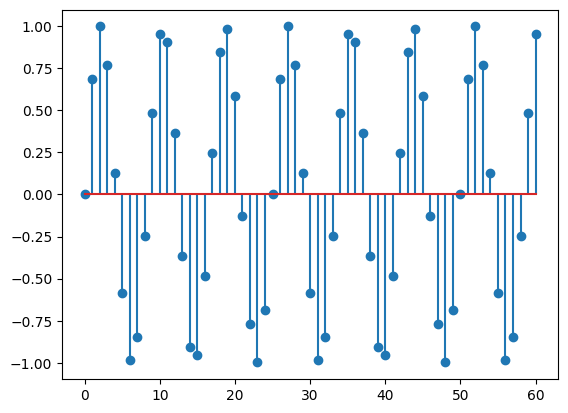

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


A0 = 1
f0 = 960
fs = 8000


k = np.arange(0,61)


t = 1/fs
w = 2 * np.pi *f0
y = np.sin(w*t*k)

plt.stem(k,y)

plt.show()

1.2 Fourier Synthesis



	Create a sawtooth signal with f_0=960 Hz and amplitude = 2 for 5 periods sampled with f_A=100 kHz. Define it for one period using the slope. For the rest of the signal, i.e. the other periods use the condition of periodicity. Plot the signal starting with 0 by adjusting the initial phase angle.

	Create the sawtooth signal using the Fourier synthesis below.

〖S_1 (t)=S〗_Sägezahn (t)=2/π [(sin⁡(ω_0 t))/1-sin⁡(2 ω_0 t)/2+sin⁡(3〖 ω〗_0 t)/3-sin⁡(4 ω_0 t)/4+sin⁡(5 ω_0 t)/5…]

Plot the sawtooth developed until “first”, “second”, “third”, “fourth”, and “fifth” harmonic frequency order together with the original sawtooth (from a) in a diagram and label your graph accordingly.

	Create a time shift for the sawtooth signal generated above (in b). The signal shall be shifted t=0.0015 sec in time. Plot the shifted and unshifted signals separately and explain the difference.




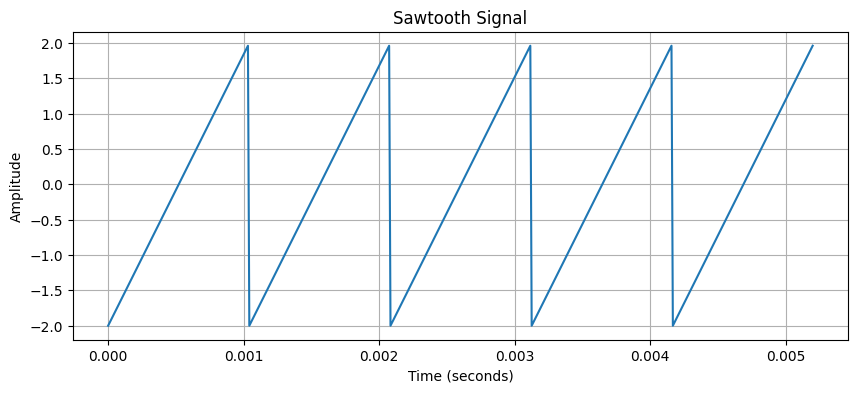

In [5]:

import numpy as np
import matplotlib.pyplot as plt

#f_0=960 Hz and amplitude = 2 for 5 periods sampled with f_A=100 kHz.
f0 = 960
A = 2
f_A = 100000
T = 1 / f0
n = 5


spp = int(f_A / f0)

t_one_period = np.linspace(0, T, spp, endpoint=False)
s1p = A * (2 * (t_one_period / T) - 1)


ss = np.tile(s1p, n)

t = np.linspace(0, n * T, n * spp, endpoint=False)


plt.figure(figsize=(10, 4))
plt.plot(t, ss, label='Sawtooth Wave')
plt.title('Sawtooth Signal')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()



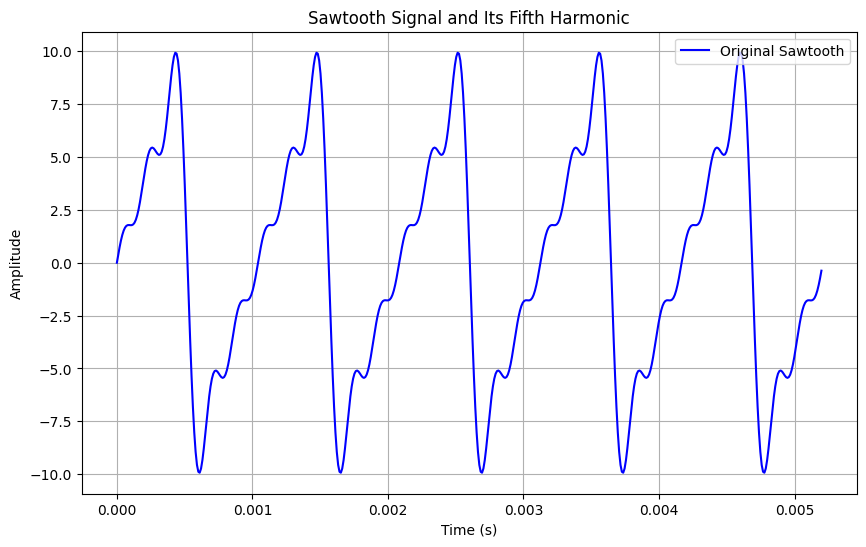

In [6]:
import numpy as np
import matplotlib.pyplot as plt


f0 = 960
amplitude = 2
num_periods = 5
fa = 100000


T = 1 / f0
t_one_period = np.linspace(0, T, int(T * fa), endpoint=False)


w = 2 * np.pi * f0


ss = np.zeros_like(t_one_period)


for n in range(1, 6):
    ss += 2 * np.pi * np.sin(n * w * t_one_period) * (-1)**(n - 1) / n

t = np.linspace(0, num_periods * T, int(num_periods * T * fa), endpoint=False)
ss = np.tile(ss, num_periods)

plt.figure(figsize=(10, 6))

plt.plot(t, ss, label='Original Sawtooth', color='blue')


plt.title('Sawtooth Signal and Its Fifth Harmonic')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()

The discrete Fourier transform (DFT) can be used to transform a sampled signal from the time domain to the frequency domain (spectral domain). Signal processing, e.g. filtering (e.g. high pass, low pass, band pass to remove interfering frequencies), can be performed either in the time domain or in the frequency domain.

In this task, we will now transform between the time domain and the frequency domain and investigate.

DFT:                                   DFT{x(k)}=X(m)=∑_(n=0)^(N-1)▒〖x(n)e^(-j2π nm/N) 〗


or after inserting:     e^ja=cos⁡(a)+j sin(a)



Inverse DFT:          IDFT{X(k)}=x(n)=1/N ∑_(m=0)^(N-1)▒〖X(m)e^(j2π nm/N) 〗

	Create a function to calculate the DFT in Python. The function should be able to take any signals, whereby the output of the function should be the DFT result.

	Calculate the DFT of a sawtooth (developed to the 4th harmonic) of fundamental frequency,
f_0=400 Hz when sampling with f_A=8 kHz

〖S_1 (t)=S〗_Sägezahn (t)=2/π [(sin⁡(ω_0 t))/1-sin⁡(2 ω_0 )/2+sin⁡(3〖 ω〗_0 )/3-sin⁡(4 ω_0 )/4]

Calculate the DFT for the sawtooth sampled once for 400 values and sampled once for 16000 values. Plot the amplitude response. What frequency range do you need to plot to represent the full information. What is the difference in the amplitude response for 400 values and 16000 values?  

	Generate a periodic square wave signal (period 400Hz) and calculate the DFT (sampling frequency 8000 Hz, 2000 readings sampled). Plot the amplitude response.
  


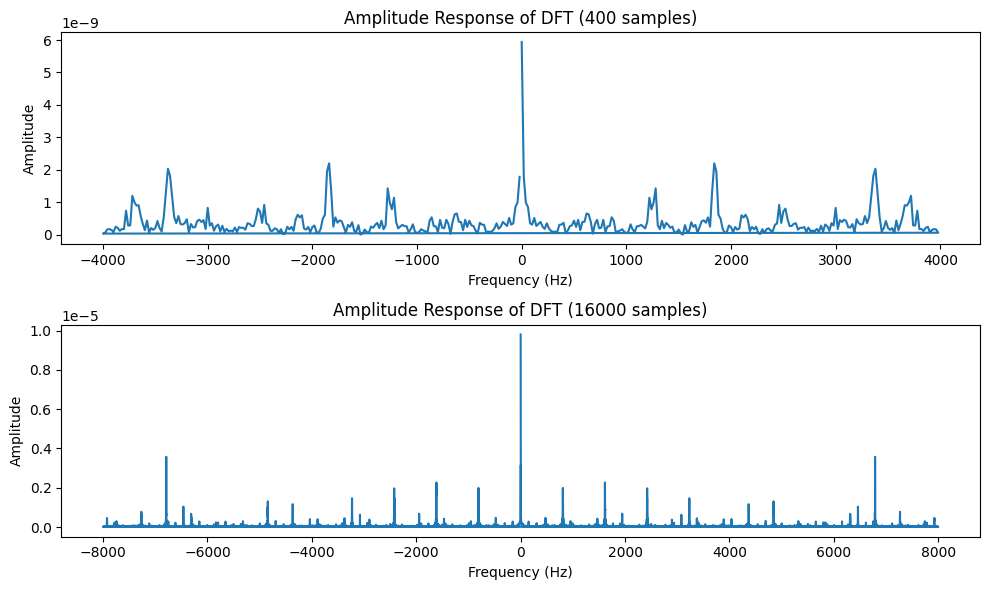

In [2]:
import numpy as np
import matplotlib.pyplot as plt


def DFT(signal):
    N = len(signal)
    n = np.arange(N)
    k = n.reshape((N, 1))
    e = np.exp(-2j * np.pi * k * n / N)
    return np.dot(e, signal)

def sawtooth_wave(f0, samples):
    t = np.arange(samples)
    omega_0 = 2 * np.pi * f0
    sawtooth = (2/np.pi) * (np.sin(omega_0 * t) + np.sin(2 * omega_0 * t) / 2 + np.sin(3 * omega_0 * t) / 3 - np.sin(4 * omega_0 * t) / 4)

    return sawtooth

f0 = 400
fA_1 = 8000
fA_2 = 16000

samples_1 = 400
samples_2 = 16000
sawtooth_1 = sawtooth_wave(f0, samples_1)
sawtooth_2 = sawtooth_wave(f0, samples_2)

dft_sawtooth_1 = DFT(sawtooth_1)
dft_sawtooth_2 = DFT(sawtooth_2)



freq_1 = np.fft.fftfreq(samples_1, 1/fA_1)
freq_2 = np.fft.fftfreq(samples_2, 1/fA_2)


plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(freq_1, np.abs(dft_sawtooth_1))
plt.title('Amplitude Response of DFT (400 samples)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')

plt.subplot(2, 1, 2)
plt.plot(freq_2, np.abs(dft_sawtooth_2))
plt.title('Amplitude Response of DFT (16000 samples)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()


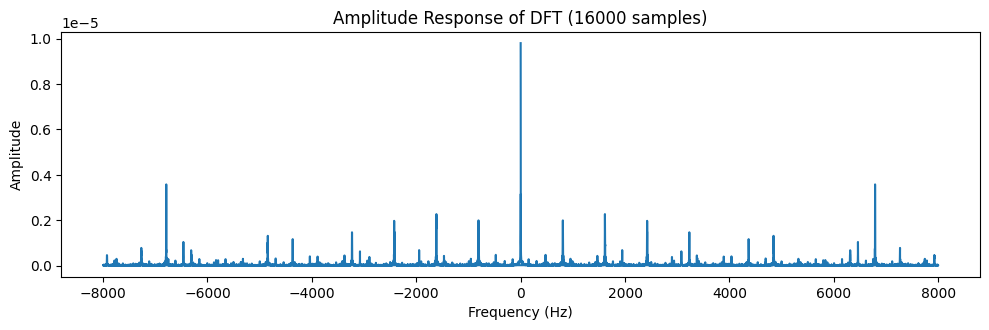

In [3]:
import numpy as np
import matplotlib.pyplot as plt


def DFT(signal):
    N = len(signal)
    n = np.arange(N)
    k = n.reshape((N, 1))
    e = np.exp(-2j * np.pi * k * n / N)
    return np.dot(e, signal)

def sawtooth_wave(f0, samples):
    t = np.arange(samples)
    omega_0 = 2 * np.pi * f0
    sawtooth = (2/np.pi) * (np.sin(omega_0 * t) + np.sin(2 * omega_0 * t) / 2 + np.sin(3 * omega_0 * t) / 3 - np.sin(4 * omega_0 * t) / 4)

    return sawtooth

f0 = 400
fA_1 = 8000
fA_2 = 16000

samples_1 = 400
samples_2 = 16000
sawtooth_1 = sawtooth_wave(f0, samples_1)
sawtooth_2 = sawtooth_wave(f0, samples_2)

dft_sawtooth_1 = DFT(sawtooth_1)
dft_sawtooth_2 = DFT(sawtooth_2)



freq_1 = np.fft.fftfreq(samples_1, 1/fA_1)
freq_2 = np.fft.fftfreq(samples_2, 1/fA_2)


plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 2)
plt.plot(freq_2, np.abs(dft_sawtooth_2))
plt.title('Amplitude Response of DFT (16000 samples)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()
